<a href="https://colab.research.google.com/github/vhpraneeth/VIT_DWDM/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

18BCE7147

[GitHub Link](https://github.com/vhpraneeth/VIT_DWDM/blob/main/Project.ipynb)


# Project topic: __Stock market prediction using Regression__

##Import the libraries

In [1]:
import math
import pandas_datareader as web  # for loading stock market data
import numpy as np
import pandas as pd

##Get the stock data

In [2]:
df = web.DataReader('AAPL', data_source='yahoo', start='2015-01-01', end='2020-12-04') 
df.head()  # Show the data 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.696352
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.000614
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.002876
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.339447
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.274624


Data has 2003 rows and 7 columns

In [3]:
df.shape

(1493, 6)

Drop Adj Close column and make Date as a column instead of index

In [4]:
df.drop('Adj Close',axis = 1, inplace = True)
df['Date'] = pd.to_datetime(df.index)
df.reset_index(drop=True, inplace=True)
df.head()

,High,Low,Open,Close,Volume,Date
0,27.860001,26.837500,27.847500,27.332500,212818400.0,2015-01-02
1,27.162500,26.352501,27.072500,26.562500,257142000.0,2015-01-05
2,26.857500,26.157499,26.635000,26.565001,263188400.0,2015-01-06
3,27.049999,26.674999,26.799999,26.937500,160423600.0,2015-01-07
4,28.037500,27.174999,27.307501,27.972500,237458000.0,2015-01-08


##Visualize the data

In [5]:
import plotly.express as px

Plotting the close price history

In [6]:
px.line(df, x='Date',y='Close', title='Close Price History')

Plotting High vs Low

In [7]:
px.scatter(df, x='High',y='Low', title='High vs Low')

Plotting Open vs Close

In [8]:
px.scatter(df, x='Open',y='Close', title='Open vs Close')

##Checking data

In [9]:
df.isnull().sum()

High      0
Low       0
Open      0
Close     0
Volume    0
Date      0
dtype: int64

In [10]:
df.isna().any()

High      False
Low       False
Open      False
Close     False
Volume    False
Date      False
dtype: bool

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1493 entries, 0 to 1492
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   High    1493 non-null   float64       
 1   Low     1493 non-null   float64       
 2   Open    1493 non-null   float64       
 3   Close   1493 non-null   float64       
 4   Volume  1493 non-null   float64       
 5   Date    1493 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5)
memory usage: 70.1 KB


In [12]:
df.describe()

,High,Low,Open,Close,Volume
count,1493.000000,1493.000000,1493.000000,1493.000000,1.493000e+03
mean,47.625487,46.631378,47.121591,47.150897,1.447350e+08
std,23.999440,23.228543,23.631543,23.630552,7.293828e+07
min,22.917500,22.367500,22.500000,22.584999,2.019780e+07
25%,29.932501,29.452499,29.637501,29.757500,9.589640e+07
50%,41.355000,40.412498,40.937500,40.912498,1.275944e+08
75%,53.605000,52.580002,53.000000,53.115002,1.757636e+08
max,137.979996,130.529999,137.589996,134.179993,6.488252e+08


## Preparing data for training

In [13]:
X = df[['Open','High','Low','Volume']]
y = df['Close']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

Rows in training data

In [15]:
X_train.shape

(1119, 4)

Rows in testing data

In [16]:
X_test.shape

(374, 4)

In [17]:
X_test.head()

,Open,High,Low,Volume
799,43.735001,43.962502,43.567501,126814000.0
1046,43.570000,43.787498,43.222500,103544800.0
1435,118.330002,118.830002,113.610001,184642000.0
54,31.780001,31.962500,31.629999,150838800.0
793,44.775002,45.119999,44.540001,155712400.0


In [18]:
y_test.head()

799      43.757500
1046     43.742500
1435    115.540001
54       31.802500
793      44.597500
Name: Close, dtype: float64

## Training the model

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [20]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
predicted = regressor.predict(X_test)

## Comparing predicted and actual

In [22]:
df_compare = pd.DataFrame({'Actual':y_test, 'Predicted':predicted})
df_compare.join(df['Date'])
df_compare.head()

,Actual,Predicted
799,43.757500,43.767477
1046,43.742500,43.482905
1435,115.540001,115.357009
54,31.802500,31.797456
793,44.597500,44.846600


In [23]:
df_compare.shape

(374, 2)

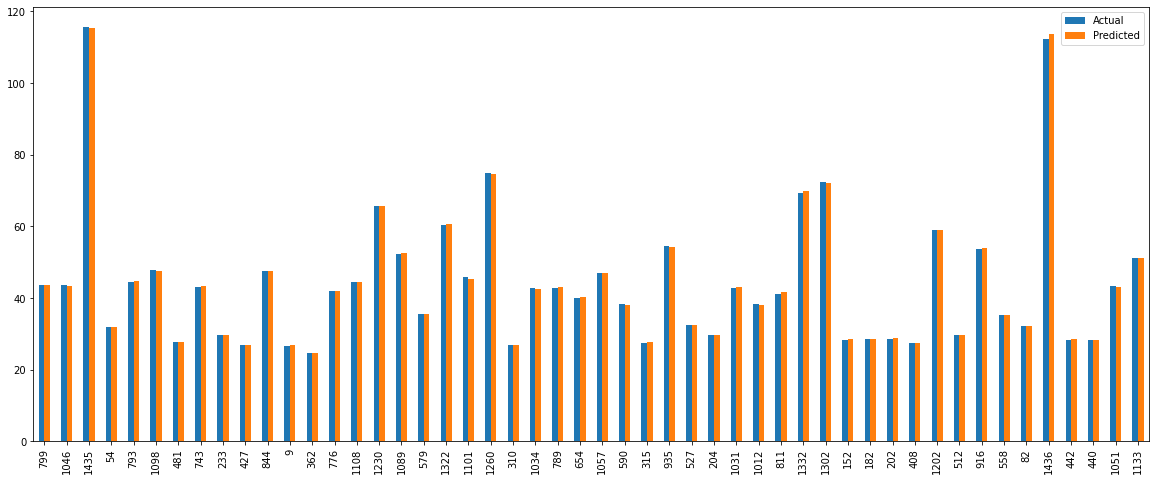

In [24]:
graph_df = df_compare.head(50)
graph_df.plot(kind='bar', figsize=(20,8))

## Score of the regressor

In [25]:
regressor.score(X_test, y_test)

0.9997348153577625

Predicting using custom values

In [26]:
X_test_2 = pd.DataFrame({'Open': 37, 'High': 38, 'Low': 37, 'Volume': 146640000.0}, index=[0])
prediction = regressor.predict(X_test_2)
print('Prediction for Close:', prediction[0])

Prediction for Close: 37.80154951246996


#Extra project below

.

.

# Project 2: __COVID-19 daily cases prediction__ - India

## Load data

In [27]:
import pandas as pd
link = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
df = pd.read_csv(link)  # public data
df = df[df.location=='India']
print('Columns:', df.columns)
df = df[['date', 'new_cases', 'new_deaths', 'new_tests']]
df['date'] = pd.to_datetime(df['date'])
df.reset_index(drop=True, inplace=True)

Columns: Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_povert

In [28]:
df.tail()

,date,new_cases,new_deaths,new_tests
313,2020-12-01,36604.0,501.0,969322.0
314,2020-12-02,35551.0,526.0,1096651.0
315,2020-12-03,36595.0,540.0,1111698.0
316,2020-12-04,36652.0,512.0,NaN
317,2020-12-05,36011.0,482.0,NaN


In [29]:
df = df.fillna(df.mean())
df.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



,date,new_cases,new_deaths,new_tests
313,2020-12-01,36604.0,501.0,9.693220e+05
314,2020-12-02,35551.0,526.0,1.096651e+06
315,2020-12-03,36595.0,540.0,1.111698e+06
316,2020-12-04,36652.0,512.0,5.783176e+05
317,2020-12-05,36011.0,482.0,5.783176e+05


In [30]:
df.shape

(318, 4)

##Visualize the data

In [31]:
import plotly.express as px

In [32]:
px.line(df, x='date',y='new_cases', title='date vs new_cases')

Using data partially

In [33]:
old_df = df.copy()
partial_df = df.iloc[250:]
df = partial_df.copy()
df.reset_index(drop=True, inplace=True)
df.head()

,date,new_cases,new_deaths,new_tests
0,2020-09-29,80472.0,1179.0,1142811.0
1,2020-09-30,86821.0,1181.0,1086688.0
2,2020-10-01,81484.0,1095.0,1423052.0
3,2020-10-02,79476.0,1069.0,1097947.0
4,2020-10-03,75829.0,940.0,1132675.0


In [34]:
px.line(df, x='date', y='new_cases', title='date vs new_cases')

## Preparing the data before training

In [35]:
X = df[['date']]
y = df['new_cases']

In [36]:
import datetime
X = pd.DataFrame(X, dtype='<M8[ns]')
X.columns = ['date']
X['date'] = pd.to_datetime(X['date'])
X['date'] = X['date'].map(datetime.datetime.toordinal)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [38]:
X_test.shape

(17, 1)

## Training the model

In [39]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
predicted = regressor.predict(X_test)
predicted

array([43048.6164487 , 56378.09097093, 53204.4065609 , 59551.77538103,
       53839.14344293, 44952.82709473, 54473.8803249 , 35431.77386457,
       38605.45827466, 34162.30010056, 55743.35408896, 47491.7746228 ,
       30988.61569047, 36701.24762863, 40509.6689207 , 48126.51150483,
       70977.03925723])

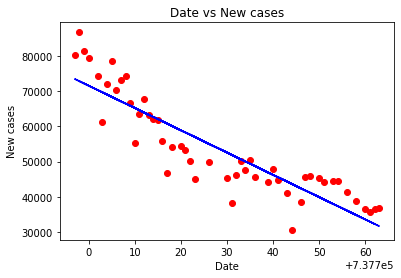

In [41]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Date vs New cases')
plt.xlabel('Date')
plt.ylabel('New cases')
plt.show()

## Comparing predicted and actual

In [42]:
df_compare = pd.DataFrame({'Actual':y_test, 'Predicted':predicted})
df_compare = df_compare.join(X_test['date'])
df_compare.head()

,Actual,Predicted,date
48,29163.0,43048.616449,737745
27,36470.0,56378.090971,737724
32,46963.0,53204.406561,737729
22,55839.0,59551.775381,737719
31,48268.0,53839.143443,737728


In [43]:
df_compare.shape

(17, 3)

In [44]:
graph_df = df_compare.head(50).copy()
graph_df.drop(['date'], axis=1, inplace=True)
graph_df.head()

,Actual,Predicted
48,29163.0,43048.616449
27,36470.0,56378.090971
32,46963.0,53204.406561
22,55839.0,59551.775381
31,48268.0,53839.143443


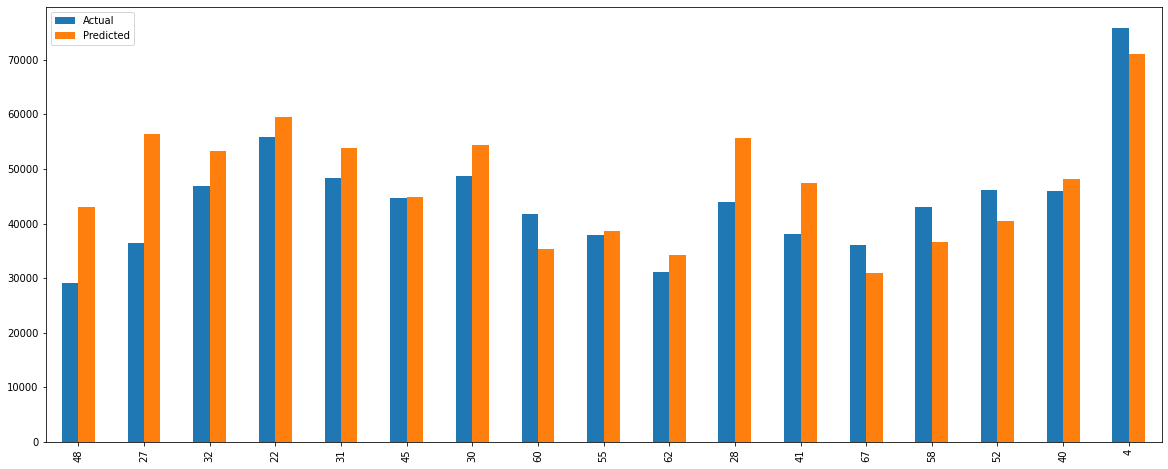

In [45]:
graph_df.plot(kind='bar', figsize=(20,8))

In [46]:
px.scatter(graph_df, x='Actual', y='Predicted', title='date vs new_cases')

## Score of the regressor

In [47]:
regressor.score(X_test, y_test)  # very low

0.3793990508636688

## Prediction using custom values

Display today's date

In [48]:
from datetime import date

today_date = date.today().strftime("%d-%m-%y")
print("Today's date:", today_date)

Today's date: 06-12-20


Predict for today

In [49]:
X_test_2 = pd.DataFrame({'date': today_date}, index=[0])

X_test_2 = pd.DataFrame(X_test_2, dtype='<M8[ns]')
X_test_2['date'] = date.today()
X_test_2['date'] = X_test_2['date'].map(datetime.datetime.toordinal)

regressor.fit(X, y)
result = regressor.predict(X_test_2)
print('Prediction for today:', int(result[0]) )

Prediction for today: 30014
